In [9]:
from astropy.coordinates import SkyCoord
from astropy.io import ascii
from astropy.io import fits
from astropy.table import Column
from astroquery.mast import Tesscut
from lightkurve import TessTargetPixelFile, search_targetpixelfile, search_tesscut, TessLightCurve, TessLightCurveFile
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from random import randint, sample, seed

## Prepare data & make star groups

In [2]:
# Import target list
targets = ascii.read('DataInput/cluster_targets_tic.ecsv')

# Display targets in group 15-mag and show their TIC ID
current_group = 15

groups = targets['G Group']

targets['TIC ID'][groups == current_group]

93022865
93836256
92581404
93276234
94183782
94103916
93268062
93554492
93272005
93273595
93268298


## Prepare sample files for interaction and mask extraction

In [19]:
seed(5)

n_stars = len(targets[groups == current_group])
idxs = sample(range(0, n_stars), min(n_stars, 4))
sample_filename = 'DataOutput/SampleTPFs/TESS_{0}_SEC{1}.fits'
lc_filename = 'DataOutput/LightCurves/TESS_LC_{0}_SEC{1}.fits'
sector = 8
cutoutsize = 8
ticids = targets[groups == current_group][idxs]['TIC ID']
ticids

93832597
93272005
93830111
144755157


### Start with first sample

In [11]:
tpf = search_tesscut(ticids[0], sector=sector).download(cutout_size=cutoutsize)
tpf.interact(exported_filename=sample_filename.format(ticids[0], sector))
tpf

TessTargetPixelFile(TICID: 93832597)

array([[1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 3, 3, 3, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

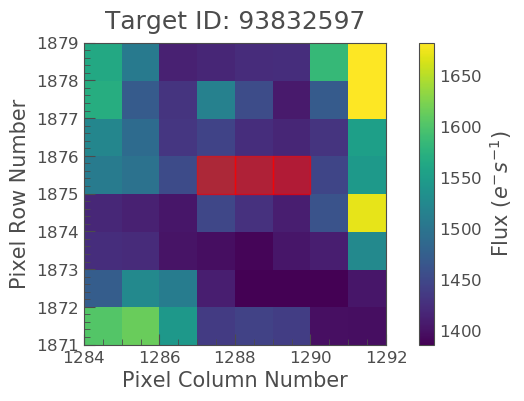

In [12]:
# Open saved LightCurve FITS file, and load the aperture mask
mask_filepath = glob(sample_filename.format(ticids[0], sector))[0]
lcf = TessLightCurveFile(mask_filepath)
current_aperture = lcf.hdu[2].data

# Display current aperture
tpf.plot(aperture_mask=current_aperture, mask_color='red')
current_aperture

### Start with second sample

In [13]:
tpf = search_tesscut(ticids[1], sector=sector).download(cutout_size=cutoutsize)
tpf.interact(exported_filename=sample_filename.format(ticids[1], sector))
tpf

TessTargetPixelFile(TICID: 93272005)

array([[1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 3, 3, 1, 1],
       [1, 1, 1, 1, 3, 3, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

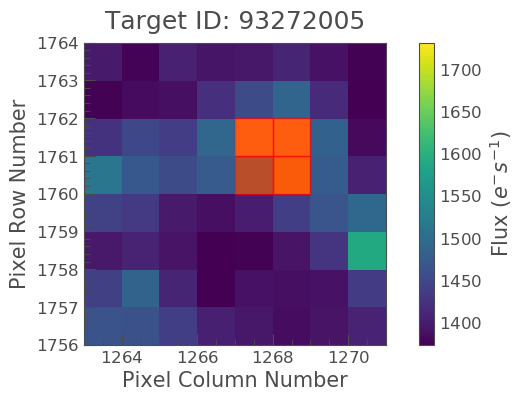

In [14]:
# Open saved LightCurve FITS file, and load the aperture mask
mask_filepath = glob(sample_filename.format(ticids[1], sector))[0]
lcf = TessLightCurveFile(mask_filepath)
current_aperture = lcf.hdu[2].data

# Display current aperture
tpf.plot(aperture_mask=current_aperture, mask_color='red')
current_aperture

### Start with third sample

In [15]:
tpf = search_tesscut(ticids[2], sector=sector).download(cutout_size=cutoutsize)
tpf.interact(exported_filename=sample_filename.format(ticids[2], sector))
tpf

TessTargetPixelFile(TICID: 93830111)

array([[1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 3, 3, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

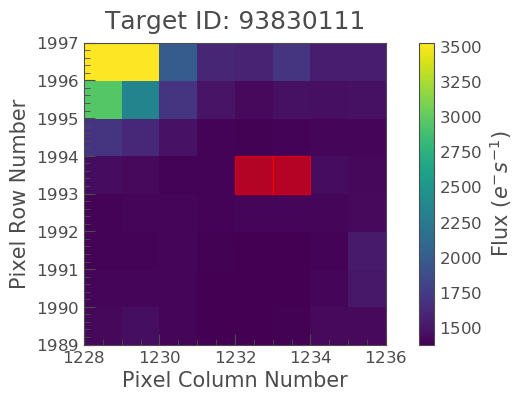

In [16]:
# Open saved LightCurve FITS file, and load the aperture mask
mask_filepath = glob(sample_filename.format(ticids[2], sector))[0]
lcf = TessLightCurveFile(mask_filepath)
current_aperture = lcf.hdu[2].data

# Display current aperture
tpf.plot(aperture_mask=current_aperture, mask_color='red')
current_aperture

In [17]:
tpf = search_tesscut(ticids[3], sector=sector).download(cutout_size=cutoutsize)
tpf.interact(exported_filename=sample_filename.format(ticids[3], sector))
tpf

TessTargetPixelFile(TICID: 144755157)

array([[1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 3, 3, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

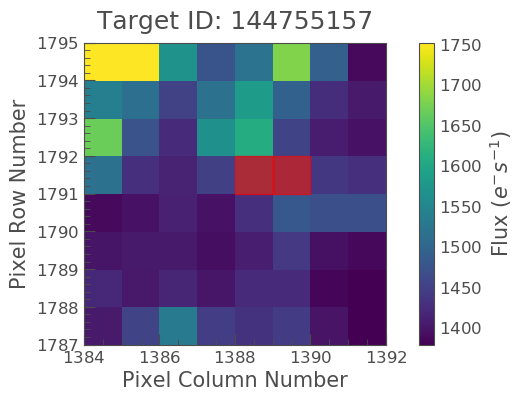

In [18]:
# Open saved LightCurve FITS file, and load the aperture mask
mask_filepath = glob(sample_filename.format(ticids[3], sector))[0]
lcf = TessLightCurveFile(mask_filepath)
current_aperture = lcf.hdu[2].data

# Display current aperture
tpf.plot(aperture_mask=current_aperture, mask_color='red')
current_aperture